In [1]:
import warnings
warnings.filterwarnings('ignore', message='.*tpfmodel submodule is not available.*')
warnings.filterwarnings('ignore', message='.*files available to download.*')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"

In [2]:
import lightkurve as lk
from astroquery.mast import Observations
import pandas as pd

# Set timeout for MAST queries
Observations.TIMEOUT = 600

#TIC 261105201
#TIC: TESS Input Catalog
#TESS: Transiting Exoplanet Survey Satellite
search = lk.search_lightcurve("TIC 261105201", mission="TESS")
search.__class__

TIC 261105201 appears as a star with the following properties:

TESS magnitude (Tmag): ~8.36 — which means it’s relatively bright in the TESS bandpass (8th magnitude) and easy for TESS to obtain good photometry on.

J-band magnitude: ~7.74 (from 2MASS near-IR) — also consistent with a bright star.

Coordinates: approximately
RA: 82.827°
Dec: −79.009°
This places it in the southern sky, in the large LMC-adjacent field TESS observed.

Object type: catalogued simply as a STAR (i.e., it’s not flagged as an extended object, galaxy, or artifact) — typical for real stellar entries.

In [ ]:
lc = search.download()
print(lc.__class__)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap the display
pd.set_option('display.max_colwidth', None) # Show full column content
print(lc.to_pandas().head(5))

<class 'lightkurve.lightcurve.TessLightCurve'>
                     flux   flux_err  timecorr  cadenceno  centroid_col  \
time                                                                      
1325.298254  77706.023438  31.505348  0.001137      70446   1389.209686   
1325.299643  77854.859375  31.538471  0.001137      70447   1389.209119   
1325.301032  77880.664062  31.546356  0.001137      70448   1389.207958   
1325.302421  77989.921875  31.566448  0.001137      70449   1389.201113   
1325.303810  78107.578125  31.586382  0.001137      70450   1389.200501   

             centroid_row      sap_flux  sap_flux_err      sap_bkg  \
time                                                                 
1325.298254    394.033511  74150.085938     29.947535  1948.794556   
1325.299643    394.029058  74294.109375     29.979017  1955.023438   
1325.301032    394.018141  74319.726562     29.986513  1964.177124   
1325.302421    394.018250  74425.078125     30.005611  1967.232178   
1325.30

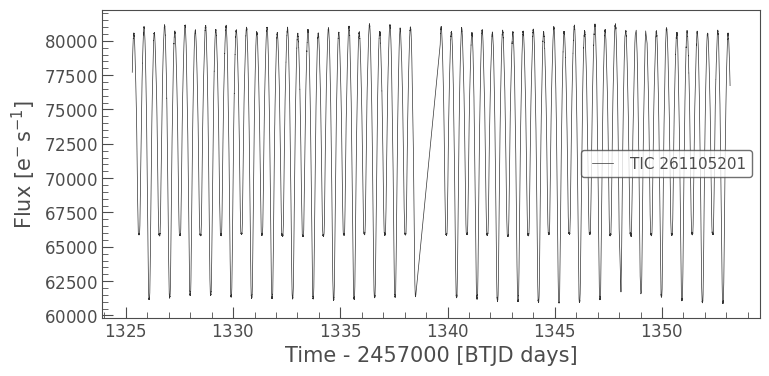

In [63]:

lc.plot()

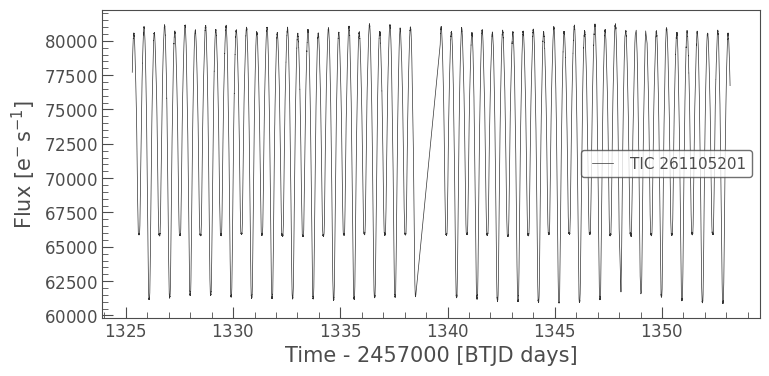

In [64]:
lc_clean = lc.remove_nans().remove_outliers(sigma=5)
lc_clean.plot()